<a href="https://colab.research.google.com/github/kingy0ujin/2024-1-my-BDA/blob/main/inhome/11w_0521_tue_B_conda_ch11_geocode_folium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터분석프로그래밍**
> 11주차 B반

# 파이썬 설치 확인

In [ ]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [ ]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
# import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
# print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1


# PC에서 한글 처리

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
# plt.rcParams['font.family'] ='Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] = False

## 그래프 설정

In [ ]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [ ]:
# 모든 설정 되돌리기
# plt.rcParams.update(plt.rcParamsDefault)

In [ ]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

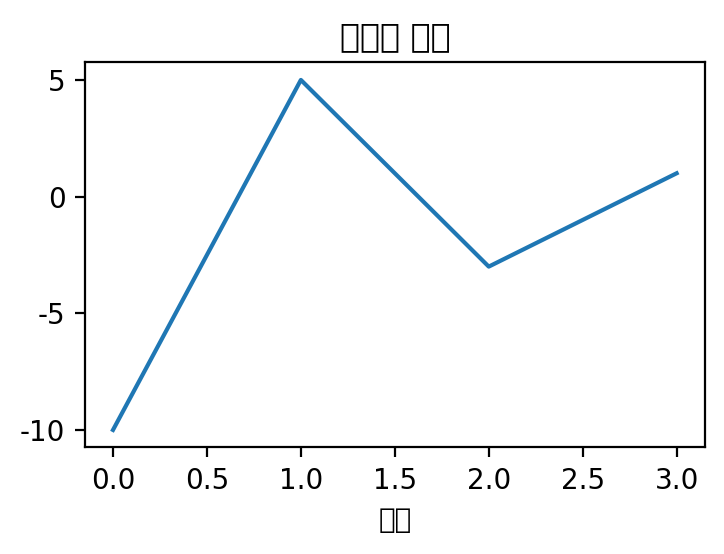

In [ ]:
import matplotlib.pyplot as plt

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

In [ ]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 46 (delta 7), reused 7 (delta 1), pack-reused 0
Receiving objects: 100% (46/46), 4.59 MiB | 3.07 MiB/s, done.
Resolving deltas: 100% (7/7), done.


# 11 지도 시각화

## 11-1 시군구별 인구 단계 구분도 만들기
- 단계 구분도(choropleth map) : 지역별 통계치를 색깔 차이로 표현한 지도
- 인구, 소득 같은 통계치가 지역별로 어떻게 다른지 이해 가능
### 시군구별 인구 단계 구분도 만들기

#### 1. 시군구 경계 지도 데이터 준비하기

In [ ]:
# SIG.geojson : 대한민국의 시군구별 경계 좌표가 들어 있음
# 행정 구역 코드, 지역 이름, 경계 위도/경도 좌표
import json
geo = json.load(open('data/SIG.geojson', encoding = 'UTF-8'))

FileNotFoundError: [Errno 2] No such file or directory: 'data/SIG.geojson'

In [ ]:
type(geo)

In [ ]:
geo.keys()

In [ ]:
type(geo['features'])

In [ ]:
len(geo['features'])

In [ ]:
# 행정 구역 코드 출력
geo['features'][0]['properties']

In [ ]:
# 위도, 경도 좌표 출력
geo['features'][0]['geometry']['coordinates']

In [ ]:
# 행정 구역 코드 출력
geo['features'][1]['properties']

#### 2. 시군구별 인구 데이터 준비하기

In [ ]:
# Population_SIG.csv 파일 : 시군구별 인구 통계 데이터, 시군구별 행정 코드/지역이름/인구
import pandas as pd
df_pop = pd.read_csv('data/Population_SIG.csv')
df_pop.head()

In [ ]:
df_pop.info()

In [ ]:
# 행정 구역 코드가 문자 타입 -> 지도에 활용 가능
df_pop['code'] = df_pop['code'].astype(str)

#### 3. 단계 구분도 만들기

In [ ]:
!pip show folium

In [ ]:
# 위에서 없다면 다음으로 설치
!pip install folium

**(1) 배경 지도 만들기**

In [ ]:
import folium
folium.Map(location = [37.22, 127.2],  # 지도 중심 좌표(위도, 경도)
           zoom_start = 10)             # 확대 단계(지도를 확대할 정도)

In [ ]:
# 단계 구분도를 만드는 데 사용할 배경 지도 -> 지도 종류는 밝은색으로는 데 사용할 배경 지도 -> 지도 종류는 밝은색으로
map_sig = folium.Map(location = [35.95, 127.7],  # 지도 중심 좌표
                     zoom_start = 8,             # 확대 단계
                     tiles = 'cartodbpositron')  # 지도 종류
map_sig

**(2) 단계 구분도 만들기**

In [ ]:
# 지도 데이터
# 통계 데이터
# df_pop 행정 구역 코드, 인구
# geo 행정 구역 코드
folium.Choropleth(geo_data = geo,
                  data = df_pop,
                  columns = ('code', 'pop'),
                  key_on = 'feature.properties.SIG_CD') \
      .add_to(map_sig)

map_sig

**(3) 계급 구간 정하기**

In [ ]:
# 계급 구간이 적당해야 지역별 색깔 표현 가능
# 분위수를 이용해 지역을 적당히 나누는 계급 구간 정하기
# quantile() 값을 크기순으로 나열한 다음, 입력한 비율에 해당하는 값인 분위수를 구하는 함수 -> 5가지 계급 구간(6개의 값이 필요)의 하한값, 상한값을 담은 bins만들기
bins = list(df_pop['pop'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]))
bins

**(4) 디자인 수정하기**

In [ ]:
## 배경 지도 만들기

# 지도 중심 좌표
# 확대 단계
# 지도 종류
map_sig = folium.Map(location = [35.95, 127.7],
                     zoom_start = 8,
                     tiles = 'cartodbpositron')

In [ ]:
## 단계 구분도 만들기

# 지도 데이터
# 통계 데이터
# df_pop 행정 구역 코드, 인구
# geo 행정 구역 코드
# 컬러맵
# 투명도
# 경계선 투명도
# 계급 구간 기준값
# 배경 지도에 추가
folium.Choropleth(geo_data = geo,
                  data = df_pop,
                  columns = ('code', 'pop'),
                  key_on = 'feature.properties.SIG_CD',
                  fill_color = 'YlGnBu',
                  fill_opacity = 1,
                  line_opacity = 0.5,
                  bins = bins) \
      .add_to(map_sig)

map_sig

## 11-2 서울시 동별 외국인 인구 단계 구분도 만들기
- 단계 구분도 -> 최적의 장소 정하는데 활용
- 지자체 -> 외국인의 생활을 돕는 시설을 지을 장소 정할 때
### 서울시 동별 외국인 인구 단계 구분도 만들기

#### 1. 서울시 동 경계 지도 데이터 준비하기

In [ ]:
# EMD_Seoul.geojson : 서울시의 동 경계 좌표가 들어있는 파일, 서울시의 동별 행정 구역 코드, 동 이름, 동 경계 위도/경도 좌표
import json
geo_seoul = json.load(open('data/EMD_Seoul.geojson', encoding = 'UTF-8'))

In [ ]:
# 행정 구역 코드 출력
geo_seoul['features'][0]['properties']

In [ ]:
# 위도, 경도 좌표 출력
geo_seoul['features'][0]['geometry']

#### 2. 서울시 동별 외국인 인구 데이터 준비하기

In [ ]:
# Foreigner_EMD_Seoul.csv : 2021년 서울시의 동별 행정 구역 코드, 동 이름, 외국인 인구
foreigner = pd.read_csv('data/Foreigner_EMD_Seoul.csv')
foreigner.head()

In [ ]:
foreigner.info()

In [ ]:
foreigner['code'] = foreigner['code'].astype(str)

#### 3. 단계 구분도 만들기

In [ ]:
bins = list(foreigner['pop'].quantile([0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))
bins

In [ ]:
## 배경 지도 만들기

# 서울 좌표
# 확대 단계
# 지도 종류
map_seoul = folium.Map(location = [37.56, 127],
                       zoom_start = 12,
                       tiles = 'cartodbpositron')

In [ ]:
## 단계구분도 만들기

# 지도 데이터
# 통계 데이터
# foreigner 행정 구역 코드, 인구
# geo_seoul 행정 구역 코드
# 컬러맵
# 결측치 색깔
# 투명도
# 경계선 투명도
# 계급 구간 기준값
# 배경 지도에 추가
folium.Choropleth(geo_data = geo_seoul,
                  data = foreigner,
                  columns = ('code', 'pop'),
                  key_on = 'feature.properties.ADM_DR_CD',
                  fill_color = 'Blues',
                  nan_fill_color = 'White',
                  fill_opacity = 1,
                  line_opacity = 0.5,
                  bins = bins) \
      .add_to(map_seoul)

map_seoul

#### 4. 구 경계선 추가하기

In [ ]:
# SIG_Seoul.geojson  : 서울시의 구 경계 좌표를 담은 파일
geo_seoul_sig = json.load(open('data/SIG_Seoul.geojson', encoding = 'UTF-8'))

In [ ]:
## 서울 구 라인 추가

# 지도 데이터
# 투명도
# 선 두께
# 지도에 추가
folium.Choropleth(geo_data = geo_seoul_sig,
                  fill_opacity = 0,
                  line_weight = 2) \
      .add_to(map_seoul)

map_seoul

-----------------------------------------------------------------------

### (알아 두면 좋아요) `folium` 활용하기

**HTML 파일로 저장하기**

In [ ]:
map_seoul.save('map_seoul.html')

**웹 브라우저에서 html 파일 열기**

In [ ]:
import webbrowser
webbrowser.open_new('map_seoul.html')

### [folium](https://github.com/python-visualization/folium)

# end